<a href="https://colab.research.google.com/github/SaulFdz24/Extraccion-de-caracteristicas/blob/main/Actividad_4_(Extracci%C3%B3n_de_Caracter%C3%ADsticas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 4 (Extracción de Características)**

###Miguel Saúl Fernández Avalos
###A01707491

In [16]:
#Instalamos librería para análisis de variables categóricas
!pip install numpy pandas matplotlib seaborn
!pip install funpymodeling


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached funpymodeling-0.1.7-py3-none-any.whl (6.4 kB)
  Using cached seaborn-0.10.1-py3-none-any.whl (215 kB)
  Using cached sklearn-0.0.post4.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=cc223c240daad02787486061ee66ba801677c54166513f1a5eb84d341592a2e1
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [17]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [19]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

Saving microretailer_mit_lift_lab.xlsx to microretailer_mit_lift_lab.xlsx


{'microretailer_mit_lift_lab.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [20]:
#Carga desde un archivo .xlsx sin indice
mr = pd.read_excel('microretailer_mit_lift_lab.xlsx') 

In [21]:
#Verificamos información del DataFrame
mr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [22]:
#Imprimo los primeros 5 registro del dataframe
mr.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


### **Limpieza de datos**

In [23]:
mr.isnull().sum()

_record_id                                0
_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
                                       ... 
234_willingness_participate_workshop     73
318_shopkeeper_name                     123
319_shopkeepers_last_name               125
236_whatsapp                            129
235_email                               142
Length: 106, dtype: int64

In [25]:
mrSN = mr.copy()
mrSN.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


In [34]:
mrSN = mrSN.fillna(round(mr.median(),2))
mrSN = mrSN.fillna(method='bfill')
mrSN = mrSN.fillna(method='ffill')

<ipython-input-34-184597161222>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mrSN = mrSN.fillna(round(mr.mean(),2))


In [35]:
mrSN.isnull().sum()

_record_id                              0
_title                                  0
_server_updated_at                      0
_updated_by                             0
_geometry                               0
                                       ..
234_willingness_participate_workshop    0
318_shopkeeper_name                     0
319_shopkeepers_last_name               0
236_whatsapp                            0
235_email                               0
Length: 106, dtype: int64

## **Eliminación de outliers con Rango Intercuartílico**

{'whiskers': [<matplotlib.lines.Line2D at 0x7efe8b4ee410>,
 'caps': [<matplotlib.lines.Line2D at 0x7efe8b4ec070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efe8b4eeec0>,
 'medians': [<matplotlib.lines.Line2D at 0x7efe8b4887c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7efe8b4ee320>,
 'means': []}

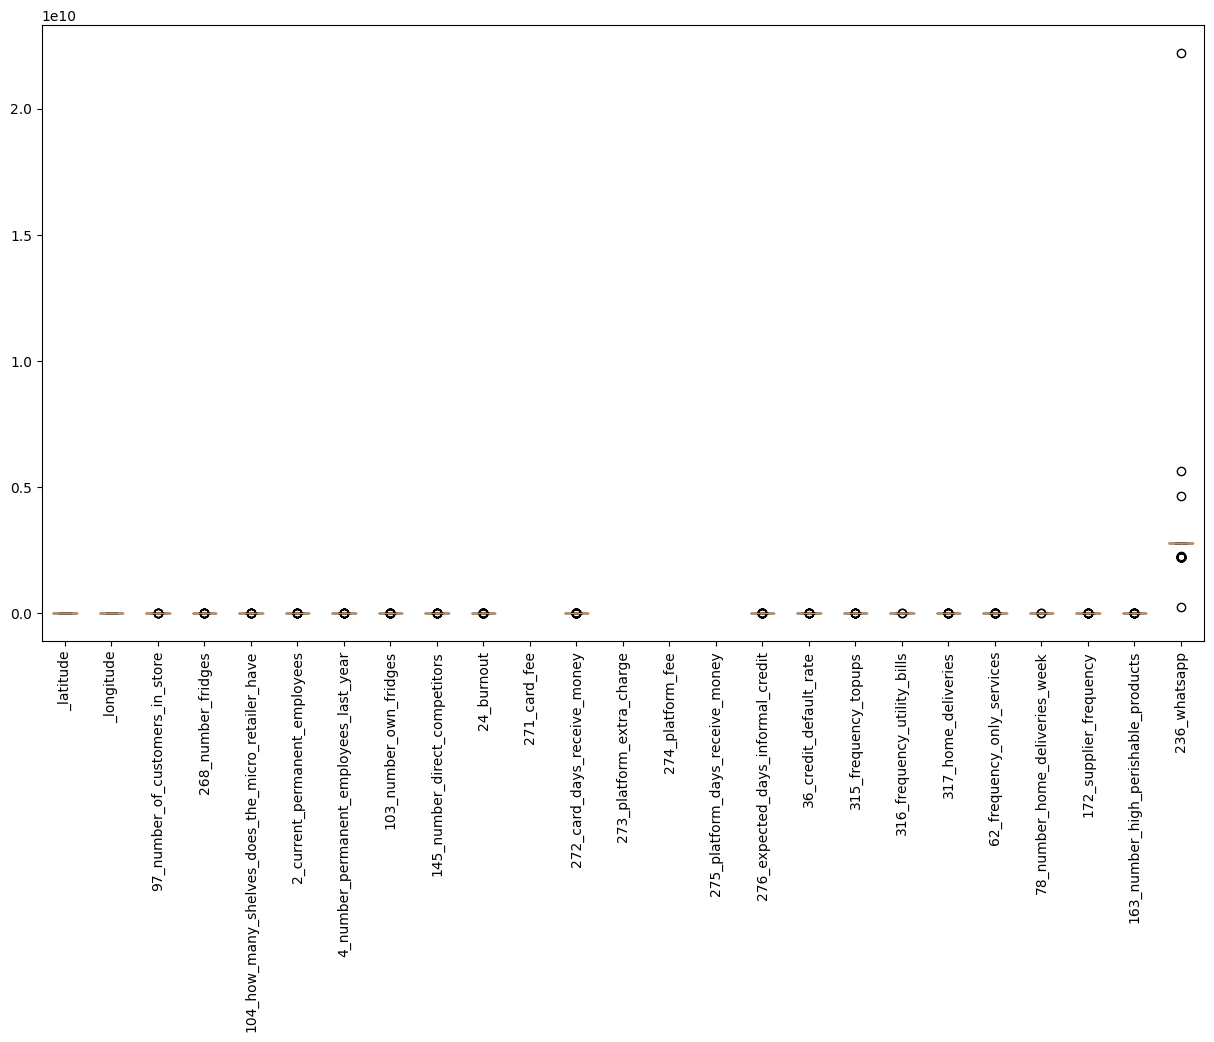

In [38]:
cuant = mrSN.select_dtypes(include=np.number).columns.tolist()
cuant_Data = mrSN.select_dtypes(include=np.number)

fig = plt.figure(figsize =(15, 8))
plt.xticks(rotation = 90)
plt.boxplot(cuant_Data,labels = cuant)

In [39]:
y = mrSN

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr

mr_clean= mrSN[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
mr_clean

<ipython-input-39-ea23338a840f>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile25 = y.quantile(0.25) #Q1
<ipython-input-39-ea23338a840f>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile75 = y.quantile(0.75) #Q3
<ipython-input-39-ea23338a840f>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mr_clean= mrSN[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]


,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,NaN,NaN,NaN,NaN,NaN,19.053536,-98.233822,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.790144e+09,NaN
1,NaN,NaN,NaN,NaN,NaN,19.053561,-98.234142,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.790144e+09,NaN
2,NaN,NaN,NaN,NaN,NaN,19.058655,-98.232300,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.790144e+09,NaN
3,NaN,NaN,NaN,NaN,NaN,19.059293,-98.233158,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.790144e+09,NaN
4,NaN,NaN,NaN,NaN,NaN,19.059585,-98.233864,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.790144e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,19.043115,-98.194066,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.790144e+09,NaN
167,NaN,NaN,NaN,NaN,NaN,19.042794,-98.193802,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.790144e+09,NaN
168,NaN,NaN,NaN,NaN,NaN,19.042809,-98.193439,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.790144e+09,NaN
169,NaN,NaN,NaN,NaN,NaN,19.042558,-98.193818,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.790144e+09,NaN


### **Division de valores cuantitativos y cualitativos**

In [40]:
data_cual = mr_clean.select_dtypes(include=['object'])
data_cual.columns

Index(['_record_id', '_title', '_server_updated_at', '_updated_by',
       '_geometry', '228_store_name', '229_store_picture', '232_type_of_store',
       '108_does_the_micro_retailer_has_a_barred_window_',
       '99_does_the_micro_retailer_exhibits_products_outside_',
       '102_does_the_micro_retailer_sells_fresh_products_',
       '184_store_devices', 'pictures_of_shelves_if_possible',
       'hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz',
       'le_comento_que_toda_esta_informacin_es_confidencial',
       '233_date_establishment', '5_change_store_space_last_year',
       '6_change_employees_average_salary_last_year',
       '20_reviews_finances_monthly', '49_inventory_records',
       '18_sales_records', '155_sales_registers_used_for', '19_tax_id',
       '310_burnout', '186_internet_connection', '210_sales_channels',
       '189_payment_methods', '28_prefered_payment_method',
       '31_different_prices_payment_method', '269_cash_discount',
       '270_card_extra_

In [42]:
data_cuant = mr_clean.select_dtypes(include=np.number)
data_cuant.columns

Index(['_latitude', '_longitude', '97_number_of_customers_in_store',
       '268_number_fridges',
       '104_how_many_shelves_does_the_micro_retailer_have',
       '2_current_permanent_employees',
       '4_number_permanent_employees_last_year', '103_number_own_fridges',
       '145_number_direct_competitors', '24_burnout', '271_card_fee',
       '272_card_days_receive_money', '273_platform_extra_charge',
       '274_platform_fee', '275_platform_days_receive_money',
       '276_expected_days_informal_credit', '36_credit_default_rate',
       '315_frequency_topups', '316_frequency_utility_bills',
       '317_home_deliveries', '62_frequency_only_services',
       '78_number_home_deliveries_week', '172_supplier_frequency',
       '163_number_high_perishable_products', '236_whatsapp'],
      dtype='object')

### **Verificación de limpieza**

In [43]:
data_cuant.isnull().sum()

_latitude                                              0
_longitude                                             0
97_number_of_customers_in_store                        5
268_number_fridges                                    10
104_how_many_shelves_does_the_micro_retailer_have      9
2_current_permanent_employees                         15
4_number_permanent_employees_last_year                12
103_number_own_fridges                                27
145_number_direct_competitors                         15
24_burnout                                            38
271_card_fee                                         171
272_card_days_receive_money                           44
273_platform_extra_charge                            171
274_platform_fee                                     171
275_platform_days_receive_money                      171
276_expected_days_informal_credit                     24
36_credit_default_rate                                14
315_frequency_topups           

In [49]:
mr_cuant = data_cuant.copy()
mr_cuant = mr_cuant.fillna(round(mr_cuant.median(),2))
mr_cuant = mr_cuant.fillna(method='ffill')

{'whiskers': [<matplotlib.lines.Line2D at 0x7efe8b30e7a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7efe8b30ece0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efe8b30c580>,
 'medians': [<matplotlib.lines.Line2D at 0x7efe8b30f220>,
 'fliers': [<matplotlib.lines.Line2D at 0x7efe8b30f4c0>,
 'means': []}

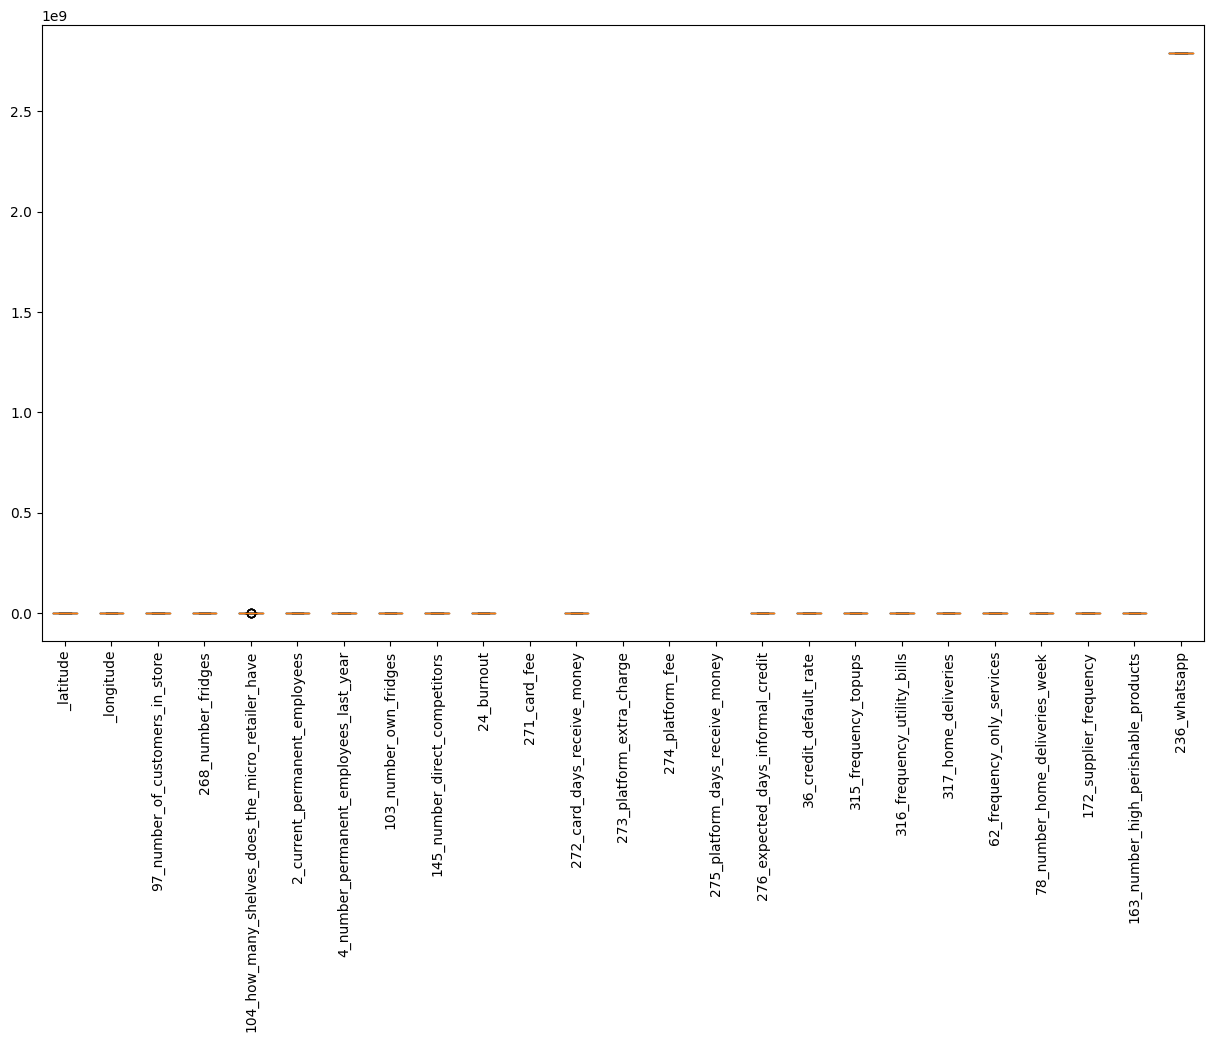

In [47]:
fig = plt.figure(figsize =(15, 8))
plt.xticks(rotation = 90)
plt.boxplot(mr_cuant,labels = mr_cuant.columns)

### **Caracteristicas cualitativas**

In [50]:
freq_tbl(mrSN)

                               _record_id  frequency  percentage  \
0    dff2998e-af74-4de6-8efd-488aca24e67b          1    0.005848   
1    53c25f08-1c1b-4c1c-97d5-b45c940735cc          1    0.005848   
2    af5c48b5-a916-47a6-aacc-1128ea1e728e          1    0.005848   
3    4790411b-df1d-44f0-a659-6d99e26ae765          1    0.005848   
4    e70db20a-25db-412b-9a71-7df285c92a3d          1    0.005848   
..                                    ...        ...         ...   
166  75bcc709-90ff-4db7-bb82-293f2f72f3ae          1    0.005848   
167  bd59c8b6-81cb-4698-8cfd-dbab7f01ef21          1    0.005848   
168  94b1c6bc-1fb8-4895-aacc-c2604dc12b93          1    0.005848   
169  d9ff4194-657e-4fb4-b5f4-b7e8b350a646          1    0.005848   
170  bf720ff0-3b7d-47ed-ba49-f5d4bfb7293c          1    0.005848   

     cumulative_perc  
0           0.005848  
1           0.011696  
2           0.017544  
3           0.023392  
4           0.029240  
..               ...  
166         0.976608  

#### 267_technology_investment_customer_preferences

In [51]:
tabla1= freq_tbl(mrSN['267_technology_investment_customer_preferences'])
tabla1

,267_technology_investment_customer_preferences,frequency,percentage,cumulative_perc
0,Totalmente de acuerdo,61,0.356725,0.356725
1,De acuerdo,47,0.274854,0.631579
2,Totalmente en desacuerdo,38,0.222222,0.853801
3,En desacuerdo,19,0.111111,0.964912
4,Ni de acuerdo ni en desacuerdo,6,0.035088,1.000000


In [52]:
tabla1_index= tabla1.set_index('267_technology_investment_customer_preferences')
tabla1_index

,frequency,percentage,cumulative_perc
267_technology_investment_customer_preferences,,,
Totalmente de acuerdo,61,0.356725,0.356725
De acuerdo,47,0.274854,0.631579
Totalmente en desacuerdo,38,0.222222,0.853801
En desacuerdo,19,0.111111,0.964912
Ni de acuerdo ni en desacuerdo,6,0.035088,1.000000


Text(0, 0.5, 'Frecuencia')

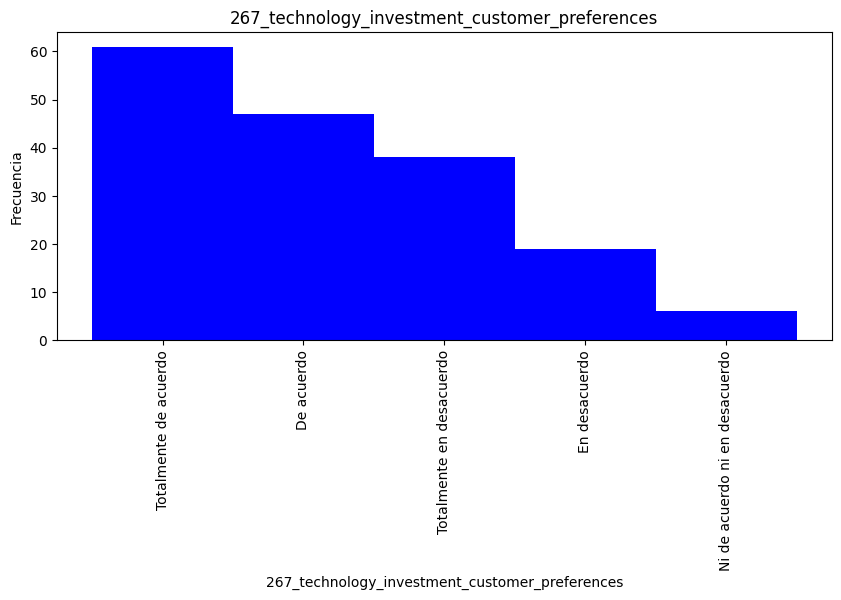

In [53]:
tabla1_index['frequency'].plot(kind = 'bar', width=1, figsize=(10,4), color= 'blue')
plt.title('267_technology_investment_customer_preferences')
plt.xlabel('267_technology_investment_customer_preferences')
plt.ylabel('Frecuencia')

#### 157_frequency_organize_shelves

In [54]:
tabla2= freq_tbl(mrSN['157_frequency_organize_shelves'])
tabla2

,157_frequency_organize_shelves,frequency,percentage,cumulative_perc
0,Semanalmente,73,0.426901,0.426901
1,Diariamente,46,0.269006,0.695906
2,Mensualmente,22,0.128655,0.824561
3,Nunca,16,0.093567,0.918129
4,Quincenalmente,10,0.058480,0.976608
5,Anualmente,2,0.011696,0.988304
6,Semestralmente,1,0.005848,0.994152
7,No se tiene,1,0.005848,1.000000


In [55]:
tabla2_index= tabla2.set_index('157_frequency_organize_shelves')
tabla2_index

,frequency,percentage,cumulative_perc
157_frequency_organize_shelves,,,
Semanalmente,73,0.426901,0.426901
Diariamente,46,0.269006,0.695906
Mensualmente,22,0.128655,0.824561
Nunca,16,0.093567,0.918129
Quincenalmente,10,0.058480,0.976608
Anualmente,2,0.011696,0.988304
Semestralmente,1,0.005848,0.994152
No se tiene,1,0.005848,1.000000


Text(0, 0.5, 'Frecuencia')

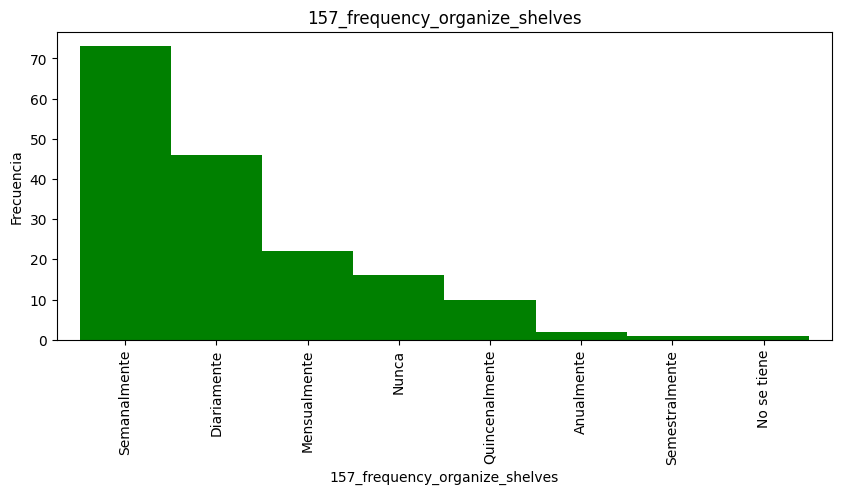

In [56]:
tabla2_index['frequency'].plot(kind = 'bar', width=1, figsize=(10,4), color= 'green')
plt.title('157_frequency_organize_shelves')
plt.xlabel('157_frequency_organize_shelves')
plt.ylabel('Frecuencia')

#### 277_payment_method_suppliers  

In [57]:
tabla3= freq_tbl(mrSN['277_payment_method_suppliers'])
tabla3

,277_payment_method_suppliers,frequency,percentage,cumulative_perc
0,Efectivo,113,0.660819,0.660819
1,Tarjeta de débito y/o crédito,19,0.111111,0.771930
2,Transferencia interbancaria,13,0.076023,0.847953
3,"Efectivo,Tarjeta de débito y/o crédito",13,0.076023,0.923977
4,"Efectivo,Transferencia interbancaria",10,0.058480,0.982456
5,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",3,0.017544,1.000000


In [59]:
tabla3_index= tabla3.set_index('277_payment_method_suppliers')
tabla3_index

,frequency,percentage,cumulative_perc
277_payment_method_suppliers,,,
Efectivo,113,0.660819,0.660819
Tarjeta de débito y/o crédito,19,0.111111,0.771930
Transferencia interbancaria,13,0.076023,0.847953
"Efectivo,Tarjeta de débito y/o crédito",13,0.076023,0.923977
"Efectivo,Transferencia interbancaria",10,0.058480,0.982456
"Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria",3,0.017544,1.000000


Text(0.5, 1.0, '277_payment_method_suppliers  ')

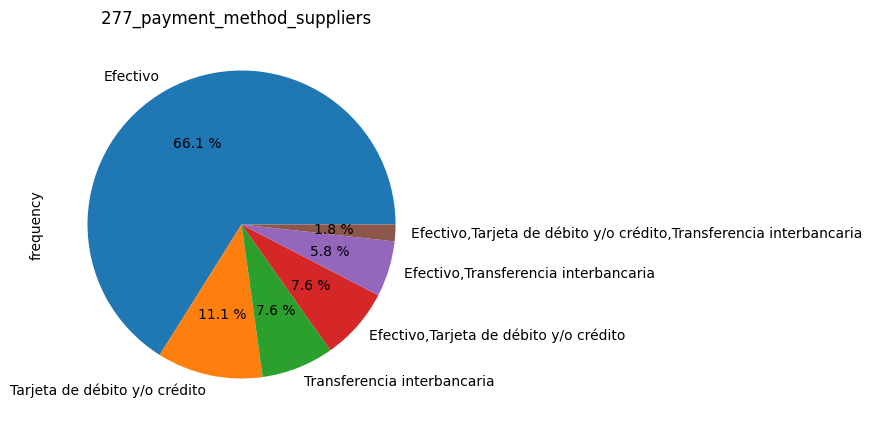

In [60]:
tabla3_index['frequency'].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")
plt.title('277_payment_method_suppliers  ')

#### 310_burnout

In [61]:
tabla4= freq_tbl(mrSN['310_burnout'])
tabla4

,310_burnout,frequency,percentage,cumulative_perc
0,no,98,0.573099,0.573099
1,yes,73,0.426901,1.000000


In [62]:
tabla4_index= tabla4.set_index('310_burnout')
tabla4_index

,frequency,percentage,cumulative_perc
310_burnout,,,
no,98,0.573099,0.573099
yes,73,0.426901,1.000000


Text(0.5, 1.0, '310_burnout')

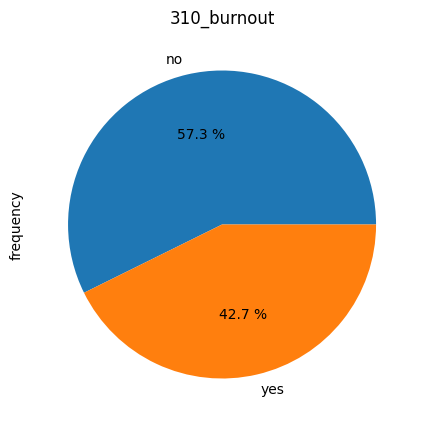

In [64]:
tabla4_index['frequency'].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")
plt.title('310_burnout')

#### 278_credit_interest

In [65]:
tabla5= freq_tbl(mrSN['278_credit_interest'])
tabla5

,278_credit_interest,frequency,percentage,cumulative_perc
0,0,138,0.807018,0.807018
1,9%+,12,0.070175,0.877193
2,1-2%,11,0.064327,0.941520
3,3-5%,8,0.046784,0.988304
4,6-8%,2,0.011696,1.000000


In [66]:
tabla5_index= tabla5.set_index('278_credit_interest')
tabla5_index

,frequency,percentage,cumulative_perc
278_credit_interest,,,
0,138,0.807018,0.807018
9%+,12,0.070175,0.877193
1-2%,11,0.064327,0.941520
3-5%,8,0.046784,0.988304
6-8%,2,0.011696,1.000000


Text(0, 0.5, 'Frecuencia')

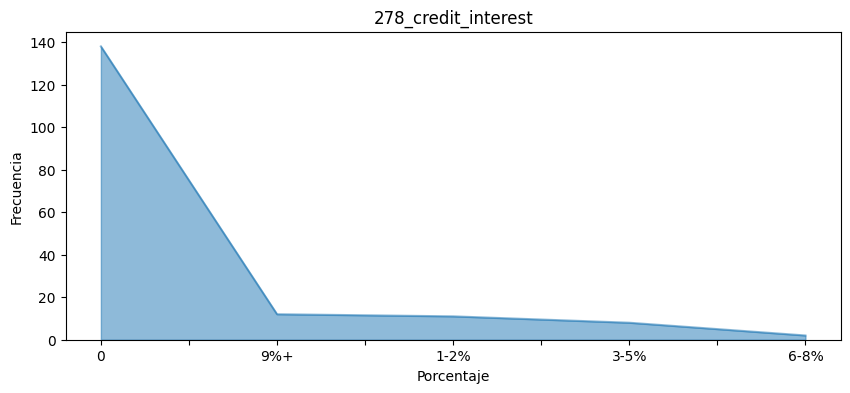

In [72]:
tabla5_index['frequency'].plot(kind='area', figsize=(10,4),alpha = 0.5)
plt.title('278_credit_interest')
plt.xlabel('Porcentaje')
plt.ylabel('Frecuencia')

#### 79_delivery_vehicle

In [69]:
tabla6= freq_tbl(mrSN['79_delivery_vehicle'])
tabla6

,79_delivery_vehicle,frequency,percentage,cumulative_perc
0,Automóvil,97,0.567251,0.567251
1,El cliente los recoge en tienda,74,0.432749,1.000000


In [70]:
tabla6_index= tabla6.set_index('79_delivery_vehicle')
tabla6_index

,frequency,percentage,cumulative_perc
79_delivery_vehicle,,,
Automóvil,97,0.567251,0.567251
El cliente los recoge en tienda,74,0.432749,1.000000


Text(0.5, 1.0, '79_delivery_vehicle')

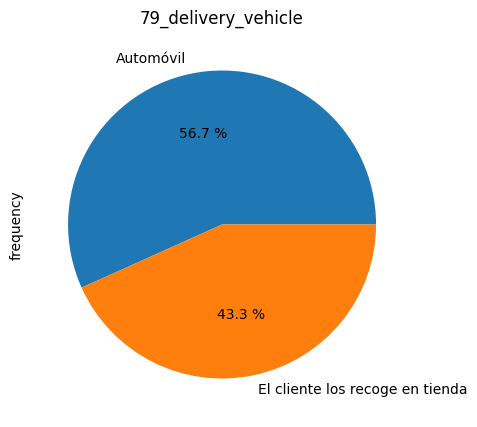

In [71]:
tabla6_index['frequency'].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")
plt.title('79_delivery_vehicle')

#### 49_inventory_records

In [73]:
tabla7= freq_tbl(mrSN['49_inventory_records'])
tabla7

,49_inventory_records,frequency,percentage,cumulative_perc
0,En papel,65,0.380117,0.380117
1,En Excel,31,0.181287,0.561404
2,Software especializado + computadora,29,0.169591,0.730994
3,No lo hago,24,0.140351,0.871345
4,"En Excel,En papel",17,0.099415,0.970760
5,Aplicación móvil (i.e. App) + smartphone,2,0.011696,0.982456
6,Mentalmente,1,0.005848,0.988304
7,"En papel,Mental",1,0.005848,0.994152
8,"Aplicación móvil (i.e. App) + smartphone,En Excel",1,0.005848,1.000000


In [74]:
tabla7_index= tabla7.set_index('49_inventory_records')
tabla7_index

,frequency,percentage,cumulative_perc
49_inventory_records,,,
En papel,65,0.380117,0.380117
En Excel,31,0.181287,0.561404
Software especializado + computadora,29,0.169591,0.730994
No lo hago,24,0.140351,0.871345
"En Excel,En papel",17,0.099415,0.970760
Aplicación móvil (i.e. App) + smartphone,2,0.011696,0.982456
Mentalmente,1,0.005848,0.988304
"En papel,Mental",1,0.005848,0.994152
"Aplicación móvil (i.e. App) + smartphone,En Excel",1,0.005848,1.000000


Text(0, 0.5, 'Frecuencia')

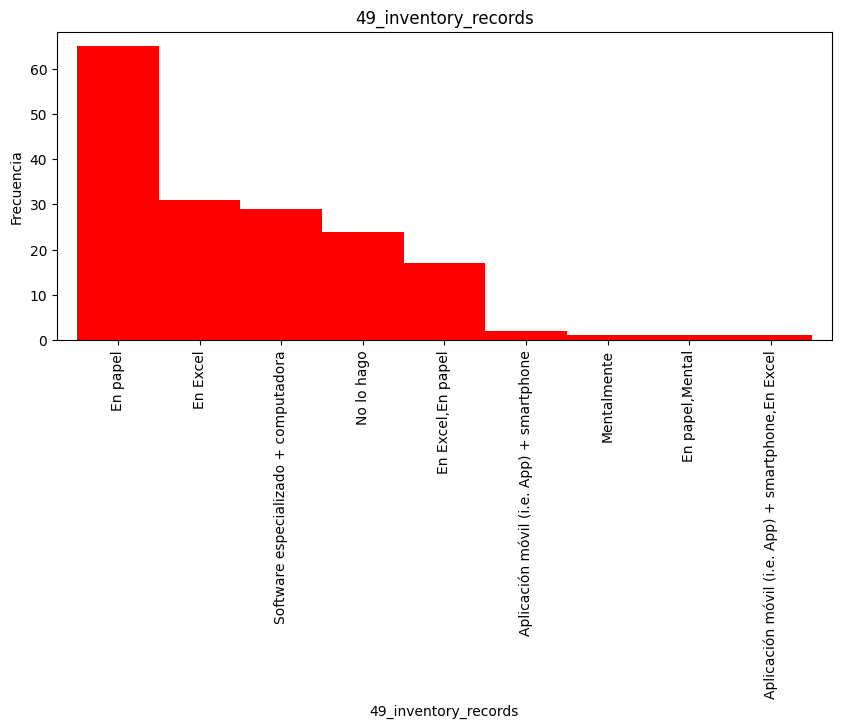

In [75]:
tabla7_index['frequency'].plot(kind = 'bar', width=1, figsize=(10,4), color= 'red')
plt.title('49_inventory_records')
plt.xlabel('49_inventory_records')
plt.ylabel('Frecuencia')

#### 28_prefered_payment_method

In [76]:
tabla8= freq_tbl(mrSN['28_prefered_payment_method'])
tabla8

,28_prefered_payment_method,frequency,percentage,cumulative_perc
0,Efectivo,112,0.654971,0.654971
1,Tarjeta de débito y/o crédito,59,0.345029,1.000000


In [77]:
tabla8_index= tabla8.set_index('28_prefered_payment_method')
tabla8_index

,frequency,percentage,cumulative_perc
28_prefered_payment_method,,,
Efectivo,112,0.654971,0.654971
Tarjeta de débito y/o crédito,59,0.345029,1.000000


<Axes: ylabel='frequency'>

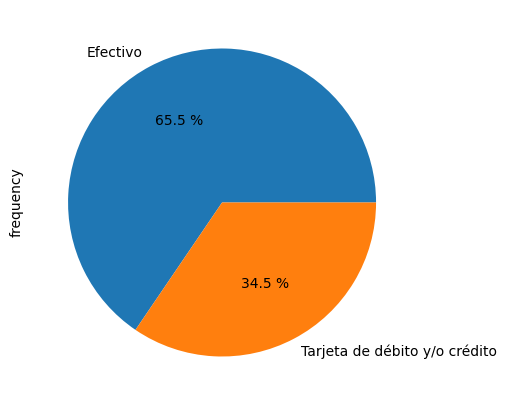

In [79]:
tabla8_index["frequency"].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")

#### 5_change_store_space_last_year

In [80]:
tabla9= freq_tbl(mrSN['5_change_store_space_last_year'])
tabla9

,5_change_store_space_last_year,frequency,percentage,cumulative_perc
0,No cambió,122,0.713450,0.713450
1,Aumentó 25%,16,0.093567,0.807018
2,Disminuyó 15%,15,0.087719,0.894737
3,Aumentó 50% o más,9,0.052632,0.947368
4,Aumentó 15%,4,0.023392,0.970760
5,Disminuyó 50% o más,3,0.017544,0.988304
6,Disminuyó 25%,2,0.011696,1.000000


In [81]:
tabla9_index= tabla9.set_index('5_change_store_space_last_year')
tabla9_index

,frequency,percentage,cumulative_perc
5_change_store_space_last_year,,,
No cambió,122,0.713450,0.713450
Aumentó 25%,16,0.093567,0.807018
Disminuyó 15%,15,0.087719,0.894737
Aumentó 50% o más,9,0.052632,0.947368
Aumentó 15%,4,0.023392,0.970760
Disminuyó 50% o más,3,0.017544,0.988304
Disminuyó 25%,2,0.011696,1.000000


Text(0, 0.5, 'Frecuencia')

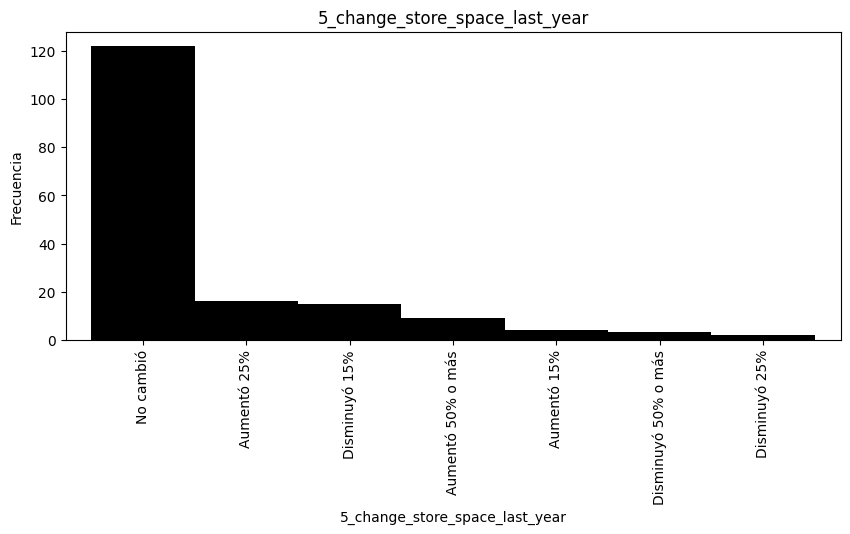

In [82]:
tabla9_index['frequency'].plot(kind = 'bar', width=1, figsize=(10,4), color= 'black')
plt.title('5_change_store_space_last_year')
plt.xlabel('5_change_store_space_last_year')
plt.ylabel('Frecuencia')

#### pictures_of_shelves_if_possible

In [83]:
tabla10= freq_tbl(mrSN['pictures_of_shelves_if_possible'])
tabla10

,pictures_of_shelves_if_possible,frequency,percentage,cumulative_perc
0,1 Photo,106,0.619883,0.619883
1,2 Photos,57,0.333333,0.953216
2,3 Photos,6,0.035088,0.988304
3,12 Photos,2,0.011696,1.000000


In [84]:
tabla10_index= tabla10.set_index('pictures_of_shelves_if_possible')
tabla10_index

,frequency,percentage,cumulative_perc
pictures_of_shelves_if_possible,,,
1 Photo,106,0.619883,0.619883
2 Photos,57,0.333333,0.953216
3 Photos,6,0.035088,0.988304
12 Photos,2,0.011696,1.000000


Text(0.5, 1.0, 'pictures_of_shelves_if_possible')

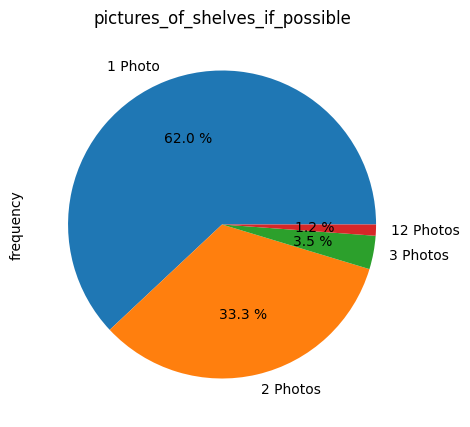

In [86]:
tabla10_index["frequency"].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")
plt.title('pictures_of_shelves_if_possible')

#### 189_payment_methods

In [87]:
tabla11= freq_tbl(mrSN['189_payment_methods'])
tabla11

,189_payment_methods,frequency,percentage,cumulative_perc
0,Efectivo,64,0.374269,0.374269
1,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",49,0.286550,0.660819
2,"Efectivo,Tarjeta de débito y/o crédito",35,0.204678,0.865497
3,"Efectivo,Transferencia interbancaria",20,0.116959,0.982456
4,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.988304
5,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.994152
6,Tarjeta de débito y/o crédito,1,0.005848,1.000000


In [88]:
tabla11_index= tabla11.set_index('189_payment_methods')
tabla11_index

,frequency,percentage,cumulative_perc
189_payment_methods,,,
Efectivo,64,0.374269,0.374269
"Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria",49,0.286550,0.660819
"Efectivo,Tarjeta de débito y/o crédito",35,0.204678,0.865497
"Efectivo,Transferencia interbancaria",20,0.116959,0.982456
"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria",1,0.005848,0.988304
"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria,Trueque (e.g. comercio o intercambio)",1,0.005848,0.994152
Tarjeta de débito y/o crédito,1,0.005848,1.000000


Text(0, 0.5, 'Frecuencia')

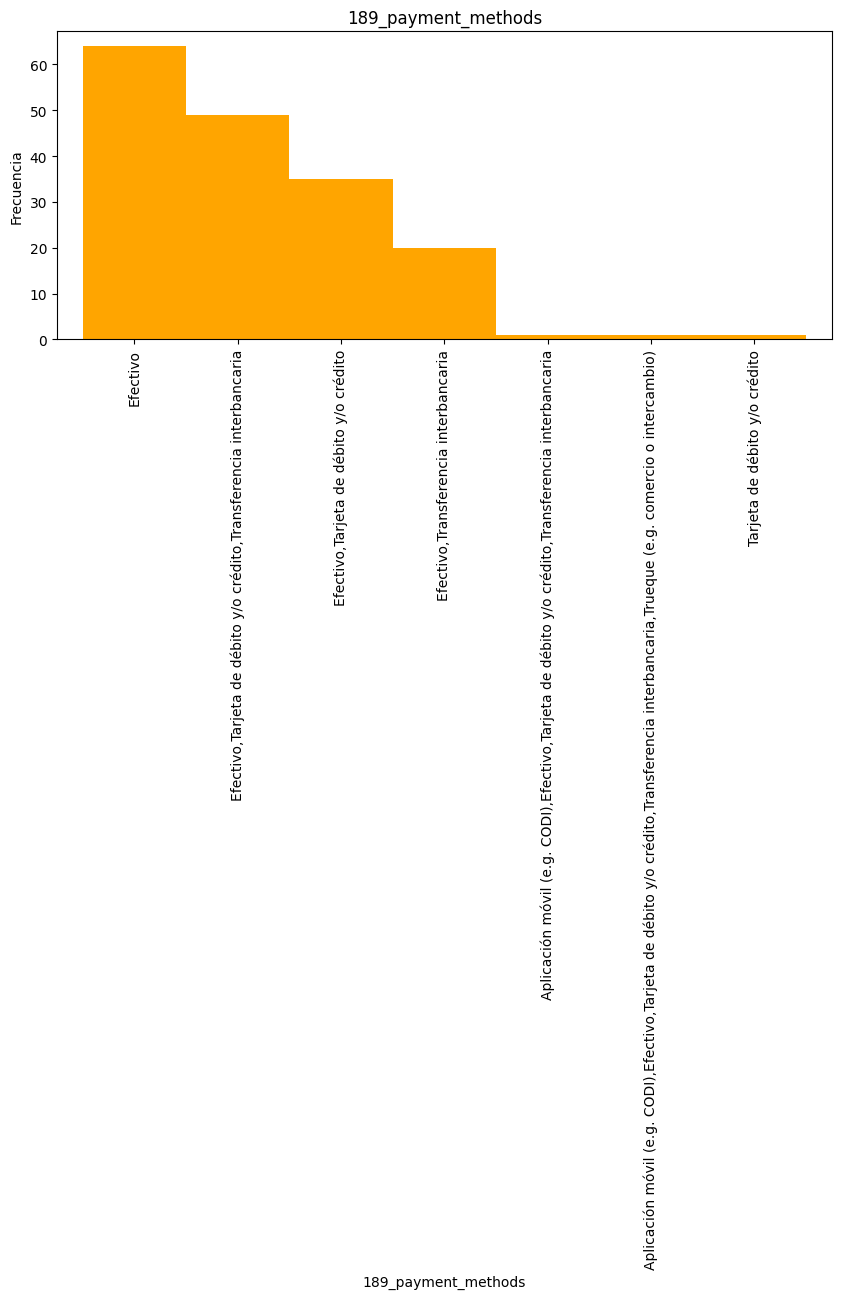

In [91]:
tabla11_index['frequency'].plot(kind = 'bar', width=1, figsize=(10,4), color= 'orange')
plt.title('189_payment_methods')
plt.xlabel('189_payment_methods')
plt.ylabel('Frecuencia')

#### 19_tax_id

In [92]:
tabla12= freq_tbl(mrSN['19_tax_id'])
tabla12

,19_tax_id,frequency,percentage,cumulative_perc
0,yes,113,0.660819,0.660819
1,no,58,0.339181,1.000000


In [93]:
tabla12_index= tabla12.set_index('19_tax_id')
tabla12_index

,frequency,percentage,cumulative_perc
19_tax_id,,,
yes,113,0.660819,0.660819
no,58,0.339181,1.000000


Text(0.5, 1.0, '19_tax_id')

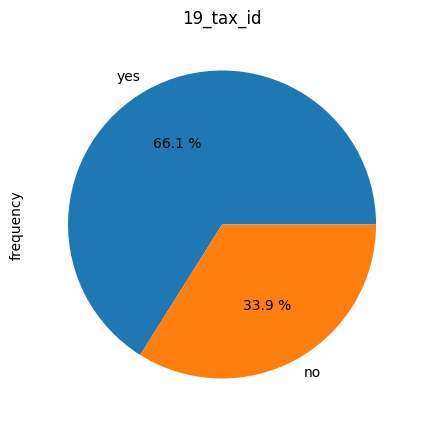

In [94]:
tabla12_index["frequency"].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")
plt.title('19_tax_id')

#### 13. Tecnológia de entrenamiento

In [ ]:
tabla13= freq_tbl(Micro_RetailerSN['249_technology_training'])
tabla13

In [ ]:
tabla13_index= tabla13.set_index('249_technology_training')
tabla13_index

,frequency,percentage,cumulative_perc
249_technology_training,,,
Totalmente de acuerdo,86,0.502924,0.534161
De acuerdo,35,0.204678,0.751553
Ni de acuerdo ni en desacuerdo,20,0.116959,0.875776
Totalmente en desacuerdo,19,0.111111,0.993789
En desacuerdo,1,0.005848,1.000000


Text(0, 0.5, 'Frecuencia')

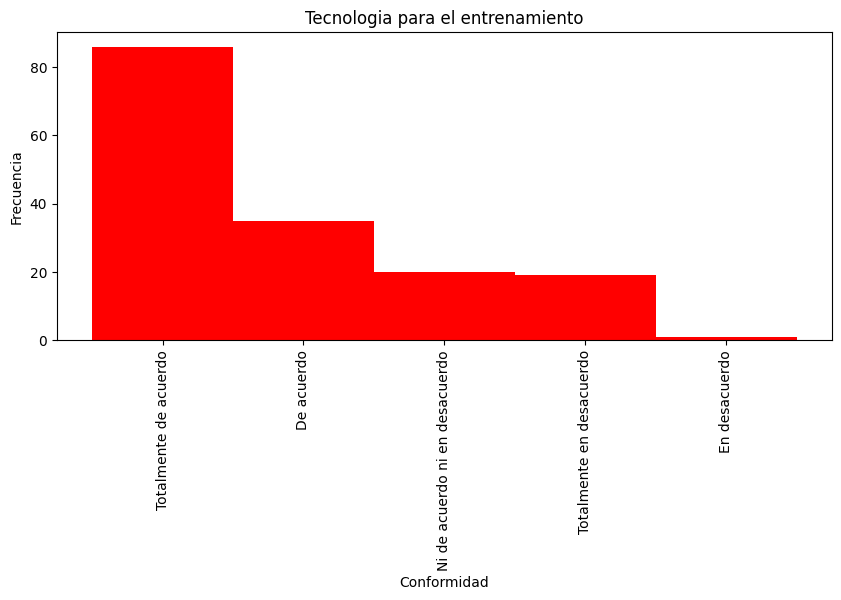

In [ ]:
tabla13_index['frequency'].plot(kind = 'bar', width=1, figsize=(10,4), color= 'red')
plt.title('Tecnologia para el entrenamiento')
plt.xlabel('Conformidad')
plt.ylabel('Frecuencia')

#### 14. Pago de utilidades

In [ ]:
tabla14= freq_tbl(Micro_RetailerSN['312_payment_of_utilities'])
tabla14

In [ ]:
tabla14_index= tabla14.set_index('312_payment_of_utilities')
tabla14_index

,frequency,percentage,cumulative_perc
312_payment_of_utilities,,,
Totalmente en desacuerdo,101,0.590643,0.627329
Totalmente de acuerdo,31,0.181287,0.819876
Ni de acuerdo ni en desacuerdo,10,0.058480,0.881988
Algo en desacuerdo,10,0.058480,0.944099
Algo de acuerdo,9,0.052632,1.000000


Text(0, 0.5, 'Frecuencia')

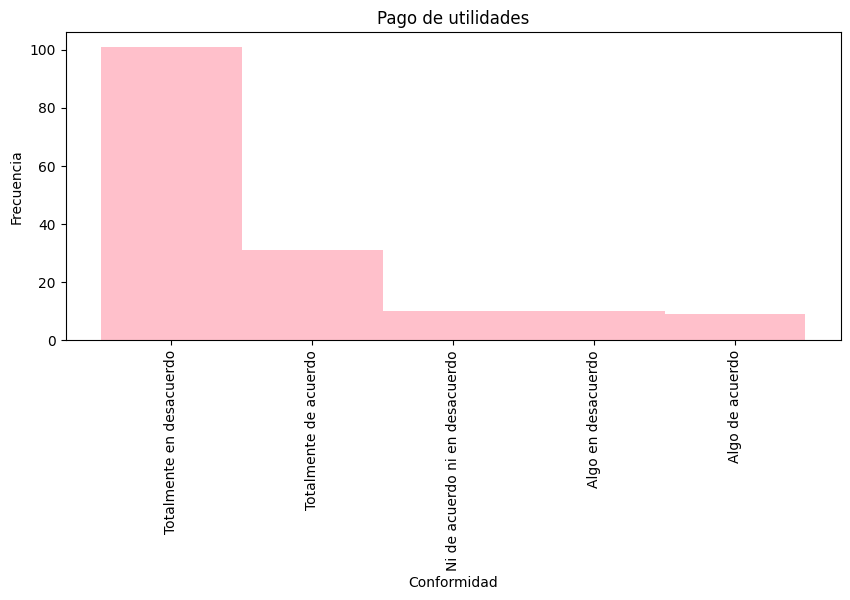

In [ ]:
tabla14_index['frequency'].plot(kind = 'bar', width=1, figsize=(10,4), color= 'pink')
plt.title('Pago de utilidades')
plt.xlabel('Conformidad')
plt.ylabel('Frecuencia')

#### 313_home_deliveries

In [95]:
tabla15= freq_tbl(mrSN['313_home_deliveries'])
tabla15

,313_home_deliveries,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,73,0.426901,0.426901
1,Algo de acuerdo,41,0.239766,0.666667
2,Totalmente de acuerdo,34,0.198830,0.865497
3,Algo en desacuerdo,13,0.076023,0.941520
4,Ni de acuerdo ni en desacuerdo,10,0.058480,1.000000


In [96]:
tabla15_index= tabla15.set_index('313_home_deliveries')
tabla15_index

,frequency,percentage,cumulative_perc
313_home_deliveries,,,
Totalmente en desacuerdo,73,0.426901,0.426901
Algo de acuerdo,41,0.239766,0.666667
Totalmente de acuerdo,34,0.198830,0.865497
Algo en desacuerdo,13,0.076023,0.941520
Ni de acuerdo ni en desacuerdo,10,0.058480,1.000000


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

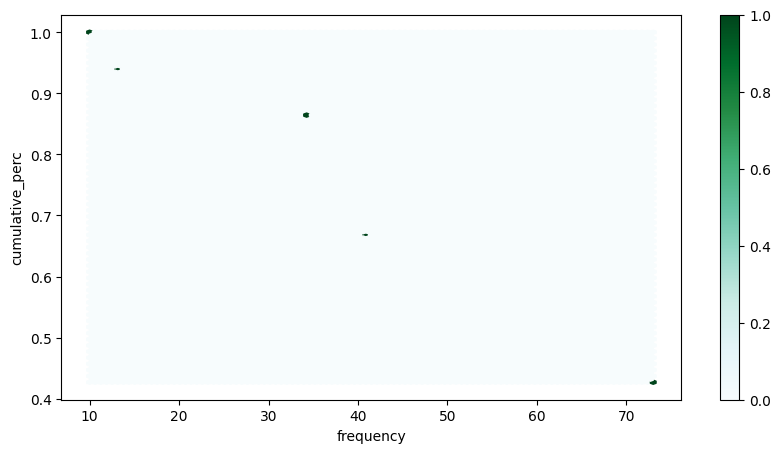

In [97]:
tabla15_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

#### 20_reviews_finances_monthly

In [98]:
tabla16= freq_tbl(mrSN['20_reviews_finances_monthly'])
tabla16

,20_reviews_finances_monthly,frequency,percentage,cumulative_perc
0,yes,127,0.74269,0.74269
1,no,44,0.25731,1.00000


In [99]:
tabla16_index= tabla16.set_index('20_reviews_finances_monthly')
tabla16_index

,frequency,percentage,cumulative_perc
20_reviews_finances_monthly,,,
yes,127,0.74269,0.74269
no,44,0.25731,1.00000


<Axes: ylabel='frequency'>

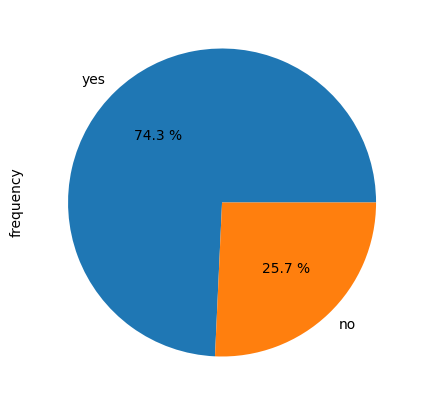

In [100]:
tabla16_index["frequency"].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")

#### 38_average_margin_profits

In [101]:
tabla17= freq_tbl(mrSN['38_average_margin_profits'])
tabla17

,38_average_margin_profits,frequency,percentage,cumulative_perc
0,10%,43,0.251462,0.251462
1,20%,25,0.146199,0.397661
2,50% +,23,0.134503,0.532164
3,5%,22,0.128655,0.660819
4,30%,17,0.099415,0.760234
5,40%,17,0.099415,0.859649
6,15%,15,0.087719,0.947368
7,35%,4,0.023392,0.970760
8,25%,4,0.023392,0.994152
9,45%,1,0.005848,1.000000


In [102]:
tabla17_index= tabla17.set_index('38_average_margin_profits')
tabla17_index

,frequency,percentage,cumulative_perc
38_average_margin_profits,,,
10%,43,0.251462,0.251462
20%,25,0.146199,0.397661
50% +,23,0.134503,0.532164
5%,22,0.128655,0.660819
30%,17,0.099415,0.760234
40%,17,0.099415,0.859649
15%,15,0.087719,0.947368
35%,4,0.023392,0.970760
25%,4,0.023392,0.994152


Text(0, 0.5, 'Frecuencia')

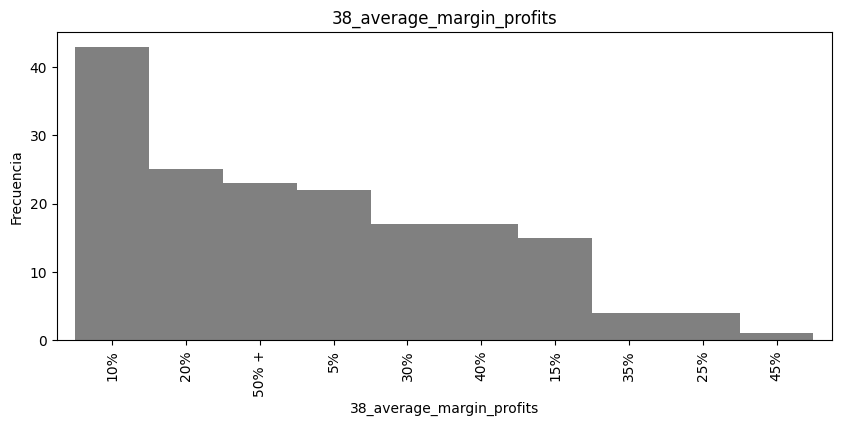

In [104]:
tabla17_index['frequency'].plot(kind = 'bar', width=1, figsize=(10,4), color= 'grey')
plt.title('38_average_margin_profits')
plt.xlabel('38_average_margin_profits')
plt.ylabel('Frecuencia')

#### 155_sales_registers_used_for

In [105]:
tabla18= freq_tbl(mrSN['155_sales_registers_used_for'])
tabla18

,155_sales_registers_used_for,frequency,percentage,cumulative_perc
0,No los uso,133,0.777778,0.777778
1,PEPS,20,0.116959,0.894737
2,Se lleva al día,18,0.105263,1.000000


In [106]:
tabla18_index= tabla18.set_index('155_sales_registers_used_for')
tabla18_index

,frequency,percentage,cumulative_perc
155_sales_registers_used_for,,,
No los uso,133,0.777778,0.777778
PEPS,20,0.116959,0.894737
Se lleva al día,18,0.105263,1.000000


<Axes: ylabel='frequency'>

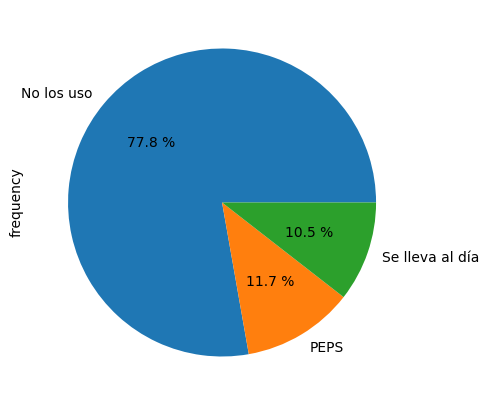

In [108]:
tabla18_index["frequency"].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%")

#### 192_procurement_planning_tools

In [109]:
tabla19= freq_tbl(mrSN['192_procurement_planning_tools'])
tabla19

,192_procurement_planning_tools,frequency,percentage,cumulative_perc
0,Ninguna,69,0.403509,0.403509
1,Cuaderno,67,0.391813,0.795322
2,Software especializado,12,0.070175,0.865497
3,Excel,7,0.040936,0.906433
4,"Cuaderno,Excel",6,0.035088,0.941520
5,"Aplicación móvil,Cuaderno",4,0.023392,0.964912
6,"Cuaderno,Excel,Software especializado",2,0.011696,0.976608
7,Aplicación móvil,1,0.005848,0.982456
8,Mentalmente,1,0.005848,0.988304
9,catálogo,1,0.005848,0.994152


In [110]:
tabla19_index= tabla19.set_index('192_procurement_planning_tools')
tabla19_index

,frequency,percentage,cumulative_perc
192_procurement_planning_tools,,,
Ninguna,69,0.403509,0.403509
Cuaderno,67,0.391813,0.795322
Software especializado,12,0.070175,0.865497
Excel,7,0.040936,0.906433
"Cuaderno,Excel",6,0.035088,0.941520
"Aplicación móvil,Cuaderno",4,0.023392,0.964912
"Cuaderno,Excel,Software especializado",2,0.011696,0.976608
Aplicación móvil,1,0.005848,0.982456
Mentalmente,1,0.005848,0.988304


Text(0, 0.5, 'Frecuencia')

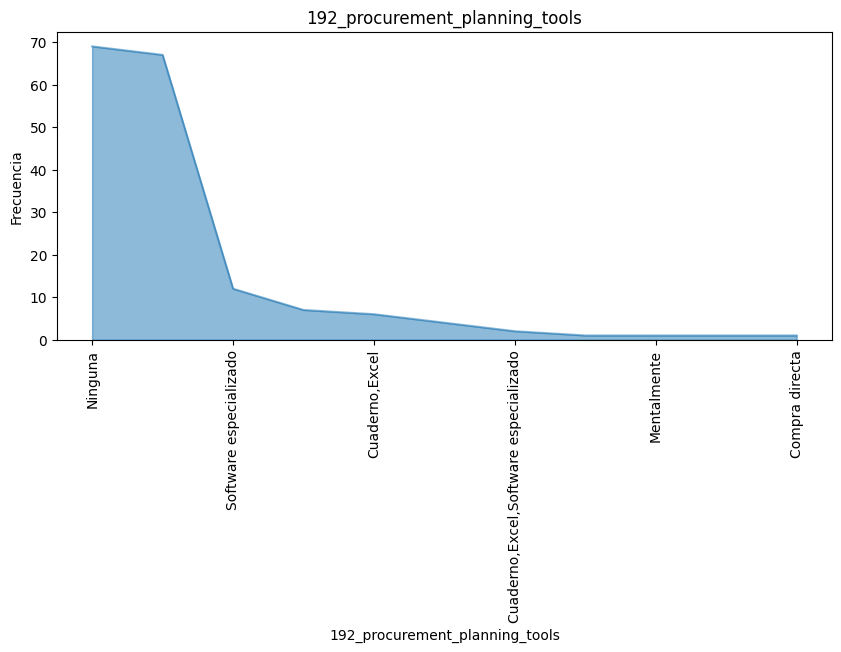

In [112]:
tabla19_index['frequency'].plot(kind='area', figsize=(10,4),alpha = 0.5)
plt.title('192_procurement_planning_tools')
plt.xlabel('192_procurement_planning_tools')
plt.xticks(rotation=90)
plt.ylabel('Frecuencia')

#### 267_technology_investment_customer_preferences


In [113]:
tabla20= freq_tbl(mrSN['267_technology_investment_customer_preferences'])
tabla20

,267_technology_investment_customer_preferences,frequency,percentage,cumulative_perc
0,Totalmente de acuerdo,61,0.356725,0.356725
1,De acuerdo,47,0.274854,0.631579
2,Totalmente en desacuerdo,38,0.222222,0.853801
3,En desacuerdo,19,0.111111,0.964912
4,Ni de acuerdo ni en desacuerdo,6,0.035088,1.000000


In [114]:
tabla20_index= tabla20.set_index('267_technology_investment_customer_preferences')
tabla20_index

,frequency,percentage,cumulative_perc
267_technology_investment_customer_preferences,,,
Totalmente de acuerdo,61,0.356725,0.356725
De acuerdo,47,0.274854,0.631579
Totalmente en desacuerdo,38,0.222222,0.853801
En desacuerdo,19,0.111111,0.964912
Ni de acuerdo ni en desacuerdo,6,0.035088,1.000000


Text(0, 0.5, 'Frecuencia')

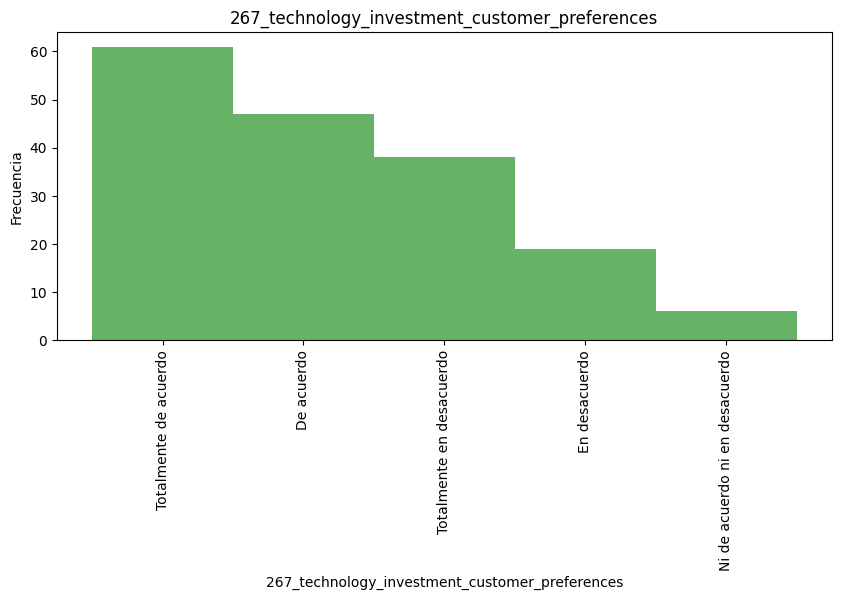

In [117]:
tabla20_index['frequency'].plot(kind = 'bar', width=1, figsize=(10,4), color= 'green', alpha = .6)
plt.title('267_technology_investment_customer_preferences')
plt.xlabel('267_technology_investment_customer_preferences')
plt.ylabel('Frecuencia')

### **Generacion de archivos**

In [ ]:
tabla1.to_excel("T1.xlsx")
tabla2.to_excel("T2.xlsx")
tabla3.to_excel("T3.xlsx")
tabla4.to_excel("T4.xlsx")
tabla5.to_excel("T5.xlsx")
tabla6.to_excel("T6.xlsx")
tabla7.to_excel("T7.xlsx")
tabla8.to_excel("T8.xlsx")
tabla9.to_excel("T9.xlsx")
tabla10.to_excel("T10.xlsx")
tabla11.to_excel("T11.xlsx")
tabla12.to_excel("T12.xlsx")
tabla13.to_excel("T13.xlsx")
tabla14.to_excel("T14.xlsx")
tabla15.to_excel("T15.xlsx")
tabla16.to_excel("T16.xlsx")
tabla17.to_excel("T17.xlsx")
tabla18.to_excel("T18.xlsx")
tabla19.to_excel("T19.xlsx")
tabla20.to_excel("T20.xlsx")

In [ ]:
#descargar archivo filtrado en csv
from google.colab import files 

files.download("T1.xlsx")
files.download("T2.xlsx")
files.download("T3.xlsx")
files.download("T4.xlsx")
files.download("T5.xlsx")
files.download("T6.xlsx")
files.download("T7.xlsx")
files.download("T8.xlsx")
files.download("T9.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("T10.xlsx")
files.download("T11.xlsx")
files.download("T12.xlsx")
files.download("T13.xlsx")
files.download("T14.xlsx")
files.download("T15.xlsx")
files.download("T16.xlsx")
files.download("T17.xlsx")
files.download("T18.xlsx")
files.download("T19.xlsx")
files.download("T20.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>